# Machine Learning

* Introduction
* Simple Task
    * Pandas
    * Scikit-learn
* Adding complexity
    * Cleaning data

## Introduction
* What is machine learning? (spam/ham filter example)
    * Manual rules - difficult to maintain/retrain (fragile)
    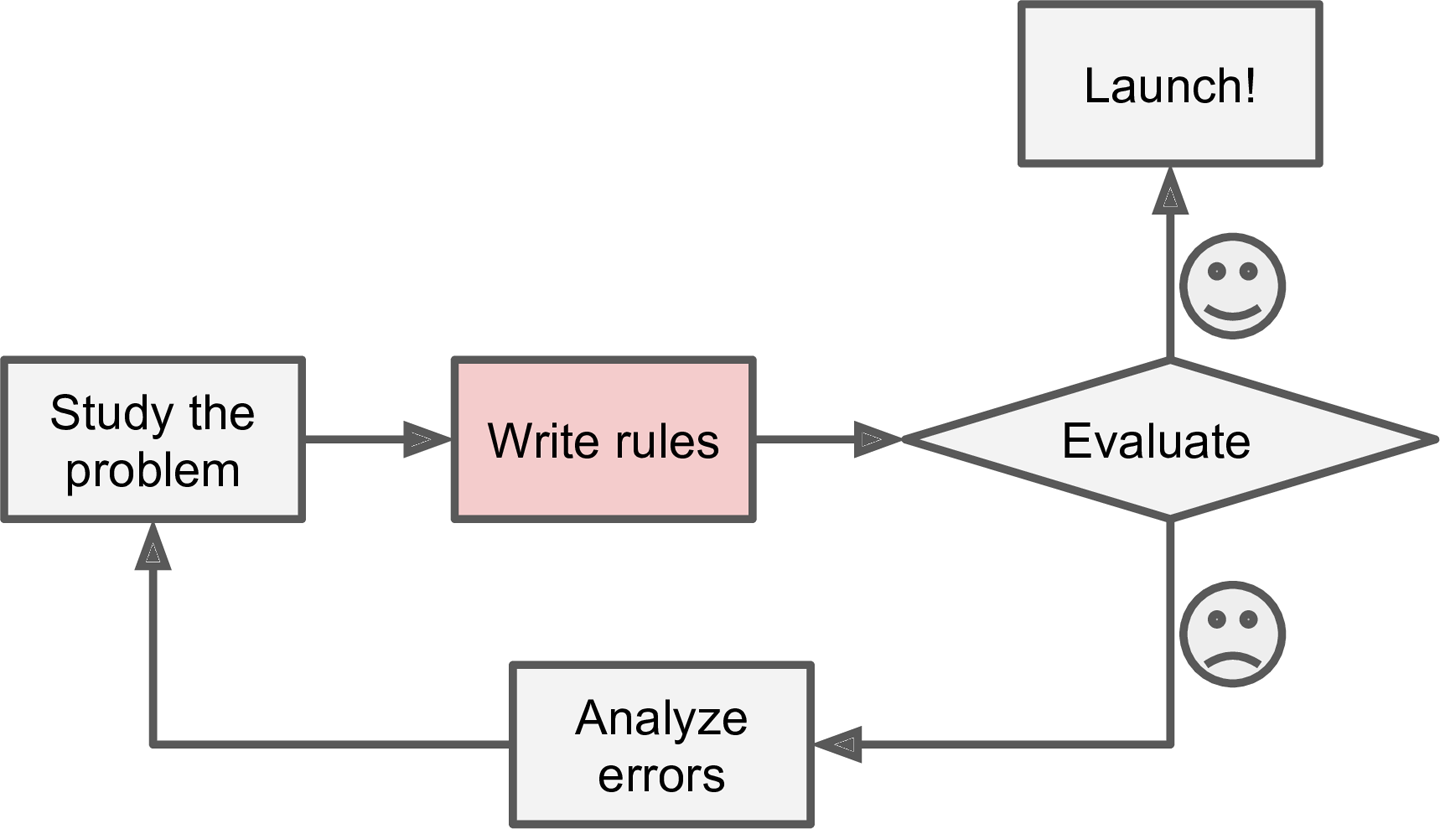
    * Machine learned rules - easily retrain (robust)
    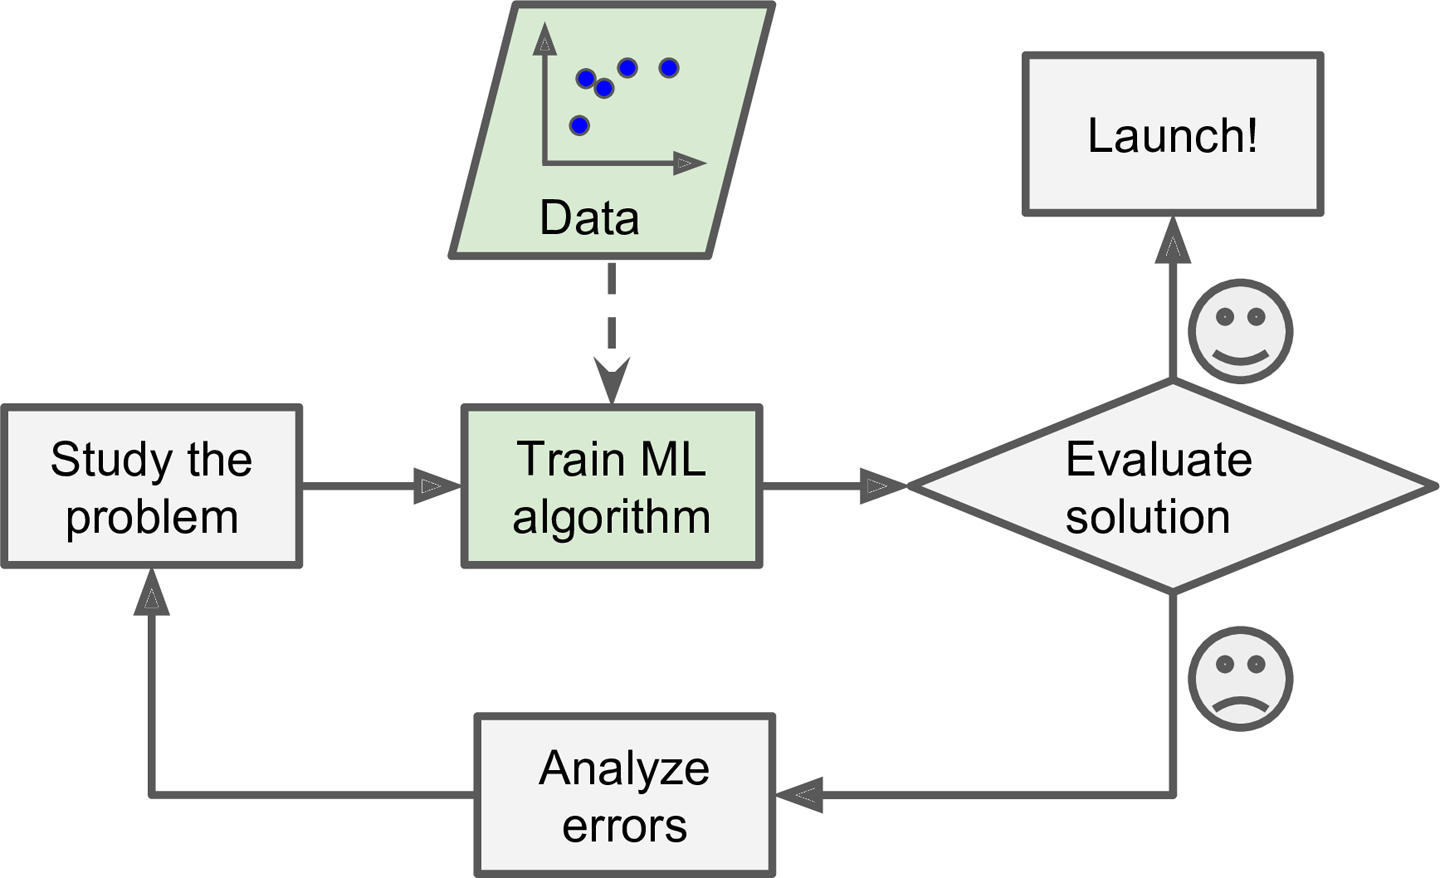
* Supervised vs unsupervised
* Large variety of algorithms, somewhat task dependent
    * No free lunch theorem (no best algorithm)
* Heavily data driven
    * With enough data, choice of algorithms isn't as important
* Overfitting
    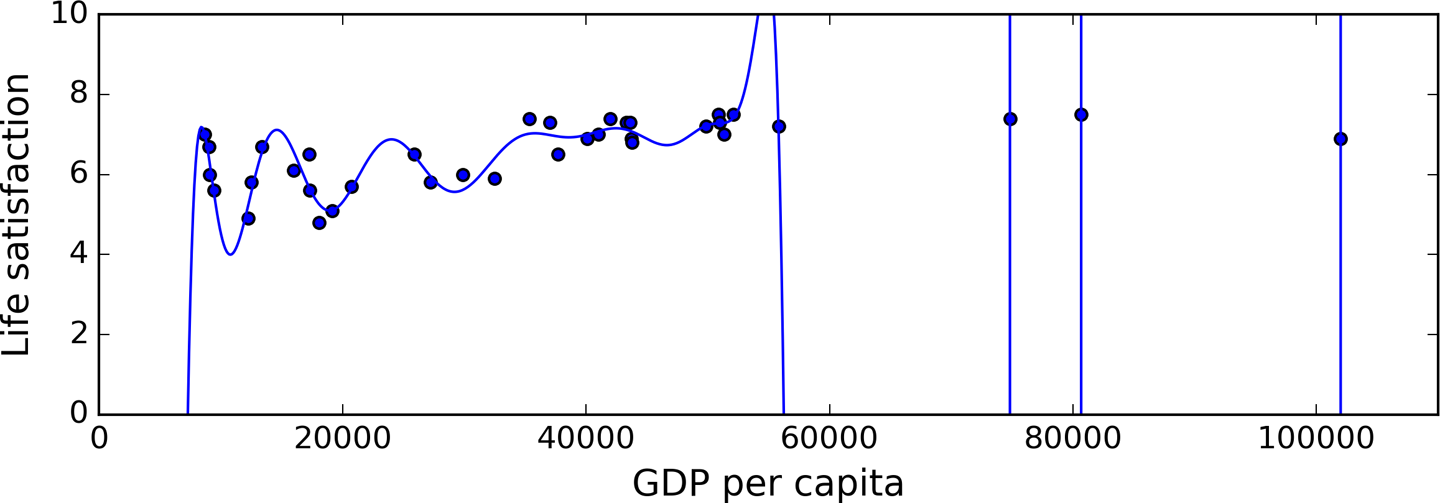
* Train vs Test
    * How do you know if you're algorithm works?
    * Crossvalidation
* Most of your effort will be data cleaning

## Simple Task

* Pandas: we have already visited pandas
* Scikit-learn: popular and general library of ML tools
    * visit documentation: http://scikit-learn.org

In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
iris_df = pd.read_csv('iris.data.txt', 
                      names=['sepal_length_cm',
                               'sepal_width_cm',
                               'petal_length_cm',
                               'petal_width_cm',
                               'kind'
                              ],
                      header=None
                     )
iris_df.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,kind
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FE51F042B0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001FE520545F8>]], dtype=object)

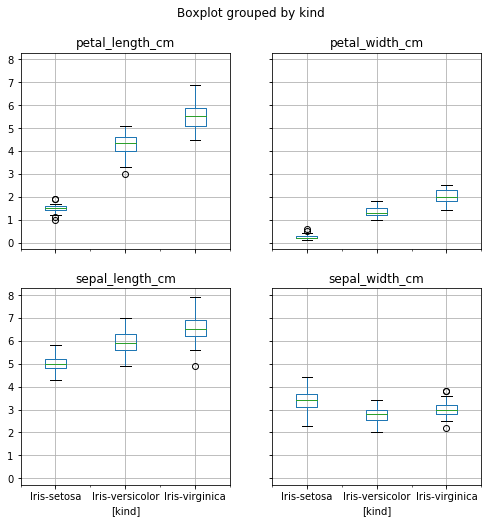

In [3]:
# could we create rules?  ... probably?
iris_df.boxplot(by='kind', figsize=(8, 8))

### Train/test split

* Necessary to ensure you're not overfitting (i.e., memorizing the data)!

In [4]:
# http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
from sklearn.model_selection import train_test_split
train, test = train_test_split(iris_df, train_size=0.8)
train.shape, test.shape

((120, 5), (30, 5))

In [5]:
# train_test_split will give different results each time, preserve them here
train.to_csv('train.csv')
test.to_csv('test.csv')

In [6]:
# let's grab our first classifier
from sklearn.tree import DecisionTreeClassifier

In [7]:
clf = DecisionTreeClassifier()
clf.fit(
    train.iloc[:, :-1],  # all columns except last [target/label/class]
    train.iloc[:, -1]  # target column
)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [8]:
y_pred = clf.predict(train.iloc[:, :-1])
y_pred

array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versi

In [9]:
from sklearn.metrics import classification_report

print(classification_report(train.iloc[:, -1], y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        42
Iris-versicolor       1.00      1.00      1.00        39
 Iris-virginica       1.00      1.00      1.00        39

    avg / total       1.00      1.00      1.00       120



Perfect accuracy! We can call it a day! ...

No, actually, we just memorized our data. 

A decision tree is inspectable, so let's see what happened...

In [10]:
# you will need to install graphviz, or just open `iris1.png`
from sklearn.tree import export_graphviz
export_graphviz(
        clf,
        out_file='iris1.dot',
        feature_names=iris_df.columns,
        class_names=clf.classes_,
        rounded=True,
        filled=True
    )

Note how we have rules which are splitting hairs (rules to classify just 1 or 2 are probably not generalizable), and so we're missing generalizations.

In [11]:
clf2 = DecisionTreeClassifier(max_depth=2)
clf2.fit(
    train.iloc[:, :-1],  # all columns except last [target/label/class]
    train.iloc[:, -1]  # target column
)
y_pred = clf2.predict(train.iloc[:,:-1])
print(classification_report(train.iloc[:, -1], y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        42
Iris-versicolor       0.97      0.95      0.96        39
 Iris-virginica       0.95      0.97      0.96        39

    avg / total       0.98      0.97      0.97       120



In [12]:
export_graphviz(
        clf2,
        out_file='iris2.dot',
        feature_names=iris_df.columns,
        class_names=clf2.classes_,
        rounded=True,
        filled=True
    )

### Test Set

Warning: Save this until the end! Otherwise, you'll overfit your test set.

See: http://blog.kaggle.com/2012/07/06/the-dangers-of-overfitting-psychopathy-post-mortem/

In [13]:
y_pred1 = clf.predict(test.iloc[:, :-1])
y_pred2 = clf2.predict(test.iloc[:, :-1])
print(classification_report(test.iloc[:, -1], y_pred1))
print(classification_report(test.iloc[:, -1], y_pred2))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
Iris-versicolor       0.79      1.00      0.88        11
 Iris-virginica       1.00      0.73      0.84        11

    avg / total       0.92      0.90      0.90        30

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
Iris-versicolor       0.79      1.00      0.88        11
 Iris-virginica       1.00      0.73      0.84        11

    avg / total       0.92      0.90      0.90        30



The extra data didn't help us at all. (Your results may vary depending on which subsection of train/test you ended up with.)

In fact, comparing `iris1.png` and `iris2.png` we see that one seems to have inferred the rules perfectly, and there are just a few outliers. Data is messy, and we don't want to fit to it.

## Using a Variety of Models

* Most have the same interface, so we can just repeat for each.
    * http://scikit-learn.org/stable/supervised_learning.html#supervised-learning
* We cheated before by looking at test to prove something. Instead, we'll use crossvalidation to get an estimated score.

In [14]:
from sklearn.naive_bayes import BernoulliNB, GaussianNB, MultinomialNB
from sklearn.neural_network import MLPClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
# for crossvalidation
from sklearn.model_selection import KFold
from sklearn.metrics import precision_recall_fscore_support

for name, clf in [('DT=2', DecisionTreeClassifier(max_depth=2)),
                  ('DT', DecisionTreeClassifier()),
                  ('BernoulliNB', BernoulliNB()),
                  ('RandomForestClassifier', RandomForestClassifier()),
                  ('AdaBoostClassifier', AdaBoostClassifier()),
                  ('SVC', SVC()),
                  ('LinearSVC', LinearSVC()),
                  ('MLPClassifier', MLPClassifier()),
                  ('GaussianNB', GaussianNB()),
                 ]:
    precs = []
    recs = []
    fscs = []
    for train_idx, test_idx in KFold(n_splits=5).split(train):
        x_train = train.iloc[train_idx].values
        x_test = train.iloc[test_idx].values
        y_pred = clf.fit(x_train[:,:-1], x_train[:, -1]).predict(x_test[:, :-1])
        # print(classification_report(x_test[:, -1], y_pred))
        p, r, f, _ = precision_recall_fscore_support(x_test[:, -1], y_pred)
        precs.append(p)
        recs.append(r)
        fscs.append(f)
    print(name, np.mean(precs), np.mean(recs), np.mean(fscs))
        

DT=2 0.980471380471 0.976851851852 0.976633986928
DT 0.970947570948 0.967328042328 0.966377576672
BernoulliNB 0.0888888888889 0.333333333333 0.139762699296
RandomForestClassifier 0.954259259259 0.950396825397 0.948708044621


C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


AdaBoostClassifier 0.948703703704 0.939285714286 0.939748887836
SVC 0.970925925926 0.969444444444 0.969342965256
LinearSVC 0.970925925926 0.969444444444 0.969342965256


C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


MLPClassifier 0.985925925926 0.984259259259 0.984203646371
GaussianNB 0.965 0.961111111111 0.960777761397


## Transformations

* `sklearn.preprocessing`: http://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing
* Categorical Features
    * http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MultiLabelBinarizer.html#sklearn.preprocessing.MultiLabelBinarizer

In [15]:
data = pd.DataFrame([
    # let's say your sql table looked like this
    # person, feature
    [1, 'dx1'],
    [1, 'dx1'],
    [1, 'dx2'],
    [1, 'dx1'],
    [2, 'dx1'],
    [4, 'dx4'],
    [5, 'dx4'],
    [5, 'dx2']
], columns=['subject', 'feature'])
data.head()

,subject,feature
0,1,dx1
1,1,dx1
2,1,dx2
3,1,dx1
4,2,dx1


In [16]:
data.groupby(['subject'])['feature'].unique().reset_index()

,subject,feature
0,1,"[dx1, dx2]"
1,2,[dx1]
2,4,[dx4]
3,5,"[dx4, dx2]"


In [17]:
data['total'] = 1

In [18]:
df = data.pivot_table(index='subject', columns='feature', values='total',
                 aggfunc='sum', fill_value=0).reset_index()

In [19]:
truth = pd.DataFrame([
    [1, 1],
    [2, 0],
    [3, 0],  # no features
    [4, 1],
    [5, 1]
], columns=['subject', 'truth'])
truth.head()

,subject,truth
0,1,1
1,2,0
2,3,0
3,4,1
4,5,1


In [20]:
new_df = pd.merge(df, truth, how='outer').fillna(0)
new_df.drop('subject', axis=1, inplace=True)
new_df.head()

,dx1,dx2,dx4,truth
0,3.0,1.0,0.0,1
1,1.0,0.0,0.0,0
2,0.0,0.0,1.0,1
3,0.0,1.0,1.0,1
4,0.0,0.0,0.0,0


Now we can start doing classification.

In [21]:
clf = RandomForestClassifier()
y_pred = clf.fit(new_df.iloc[:, :-1], new_df.iloc[:, -1]).predict(new_df.iloc[:, :-1])
print(classification_report(new_df.iloc[:, -1], y_pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00         2
          1       1.00      1.00      1.00         3

avg / total       1.00      1.00      1.00         5

